<a href="https://colab.research.google.com/github/mimomaina/Machinelearning001/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as plt
import matplotlib.pyplot as plt

# Load Dataset



In [36]:
df = pd.read_csv('/content/creditcard.csv')

# Data exploration and cleaning


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
# Count of NaN or null values in each column
nan_count = df.isna().sum()
print("Count of NaN values per column:\n", nan_count)

Count of NaN values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [39]:
# Rows with at least one NaN value
rows_with_nan = df[df.isna().any(axis=1)]
print("\nRows with NaN values:\n", rows_with_nan)


Rows with NaN values:
 Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


There are no null values in this dataset.

Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify datasets while retaining as much variance as possible. It is widely applied in situations where datasets have many features (variables), and we want to reduce redundancy and improve computational efficiency.

In [40]:
variance = df.var()

# Sort variances in descending order
variance_sorted = variance.sort_values(ascending=False)
print(variance_sorted)

Time      2.255124e+09
Amount    6.256007e+04
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Class     1.724507e-03
dtype: float64


In [41]:
cumulative_variance = variance_sorted.cumsum() / variance_sorted.sum()
print(cumulative_variance)


Time      0.999972
Amount    1.000000
V1        1.000000
V2        1.000000
V3        1.000000
V4        1.000000
V5        1.000000
V6        1.000000
V7        1.000000
V8        1.000000
V9        1.000000
V10       1.000000
V11       1.000000
V12       1.000000
V13       1.000000
V14       1.000000
V15       1.000000
V16       1.000000
V17       1.000000
V18       1.000000
V19       1.000000
V20       1.000000
V21       1.000000
V22       1.000000
V23       1.000000
V24       1.000000
V25       1.000000
V26       1.000000
V27       1.000000
V28       1.000000
Class     1.000000
dtype: float64


Amount and time columns have a higher variance in comparison to the other columns.(v1 to V28). v1 to v11 have higher variance than v12 to v28. The columns with high variance are more likely to capture fradulaent transactions better when used in fraud detection. Lower variance components ensure that model focuses on meaningful trends rather than irrelevant fluctuations.


In [42]:
# Grouping into 1-hour intervals
df['Time_1Hour'] = (df['Time'] // 3600).astype(int)
df['Time_1Hour']
print(df[['Time', 'Time_1Hour']])


            Time  Time_1Hour
0            0.0           0
1            0.0           0
2            1.0           0
3            1.0           0
4            2.0           0
...          ...         ...
284802  172786.0          47
284803  172787.0          47
284804  172788.0          47
284805  172788.0          47
284806  172792.0          47

[284807 rows x 2 columns]


In [43]:
#grouping into 30 min intervals
df['Time_in_Hours'] = df['Time'] / 3600
df['Time_30Min'] = (df['Time'] // 1800).astype(int)
df['Time_30Min'] * 30 / 60

print(df[['Time_30Min']])


        Time_30Min
0                0
1                0
2                0
3                0
4                0
...            ...
284802          95
284803          95
284804          95
284805          95
284806          95

[284807 rows x 1 columns]


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul

# Explaratory analysis and visualisation

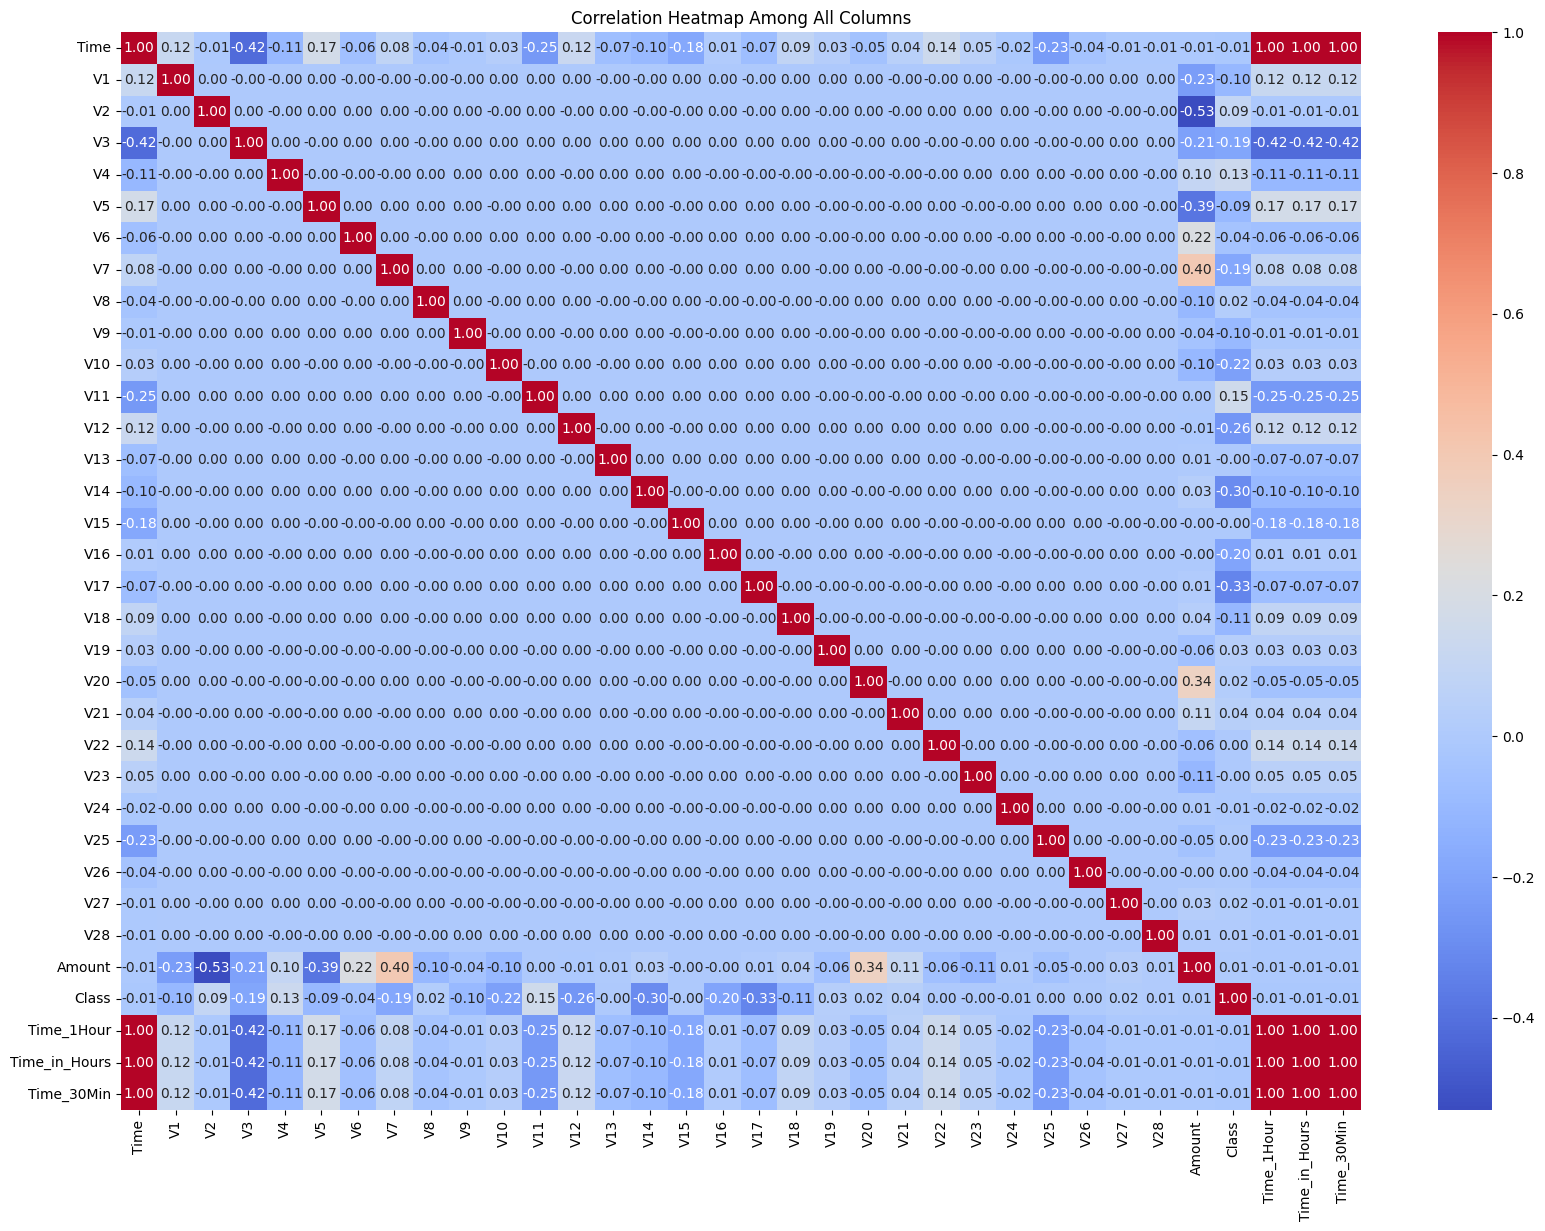

In [45]:
correlation_matrix = df.corr()

# Step 2: Generate a heatmap for all columns
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap Among All Columns")
plt.show()


The V_column have no correlation to each other.

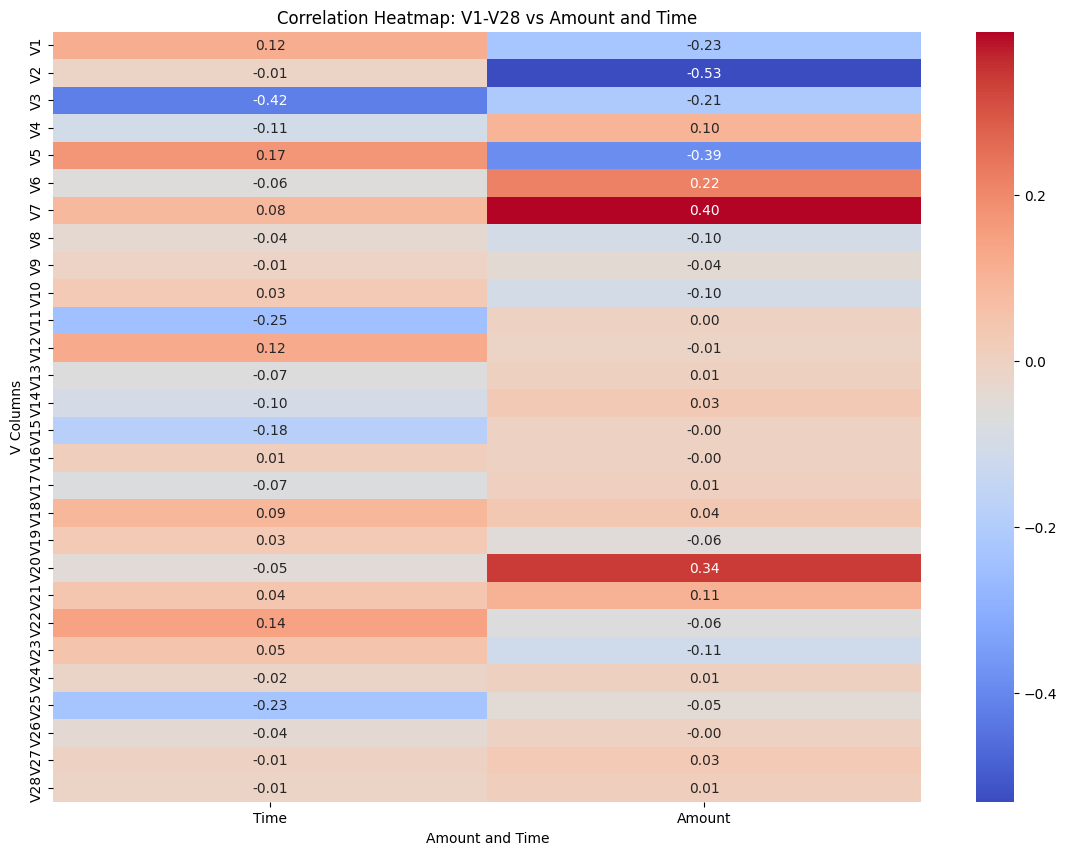

In [46]:
# Select correlations of V1 to V28 with 'Amount' and 'Time'
columns_to_check = ["Time", "Amount"]
v_columns = [col for col in df.columns if col.startswith('V')]
selected_columns = v_columns + columns_to_check

# Compute correlation for selected columns
selected_corr_matrix = df[selected_columns].corr()

# Extract correlation of V columns with 'Amount' and 'Time'
corr_with_amount_time = selected_corr_matrix.loc[v_columns, columns_to_check]

# Plot heatmap for the selected correlation
plt.figure(figsize=(14, 10))
sns.heatmap(corr_with_amount_time, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap: V1-V28 vs Amount and Time")
plt.ylabel("V Columns")
plt.xlabel("Amount and Time")
plt.show()

There is a high correlation between 'Time' and V1,V5,V7,V10,V12,V16,V18,V19,V21,V22,V23.

There is a high correlation between 'Amount' and V4,V6,V7,V11,V13,V17,V18,V21,V24,V27,V28.

In V7 and V21,there is a high correlation for Time and Amount.

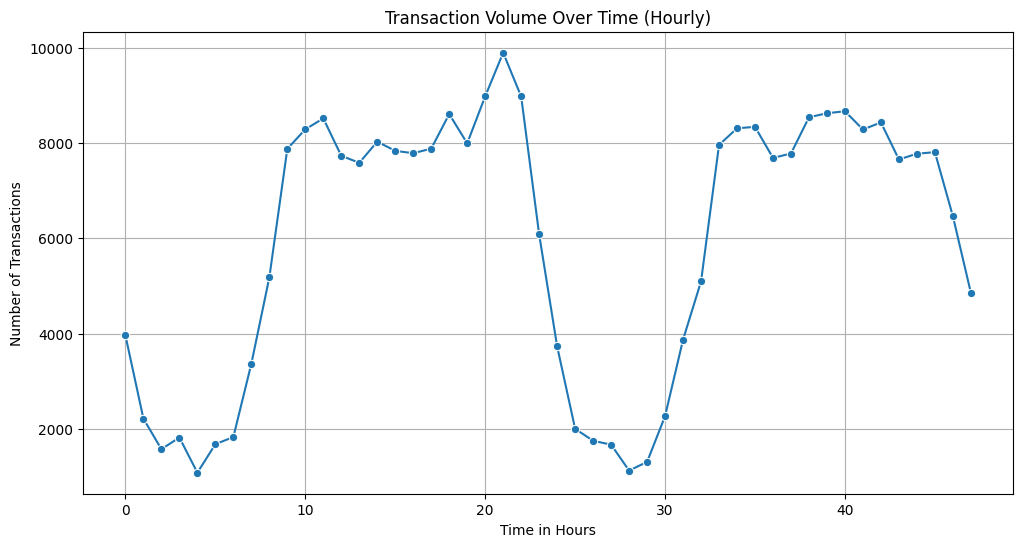

In [47]:
# Grouping transactions by hour
hourly_transactions = df.groupby('Time_1Hour').size()

# Plotting the transaction volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_transactions.index, y=hourly_transactions.values, marker='o')
plt.title('Transaction Volume Over Time (Hourly)')
plt.xlabel('Time in Hours')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


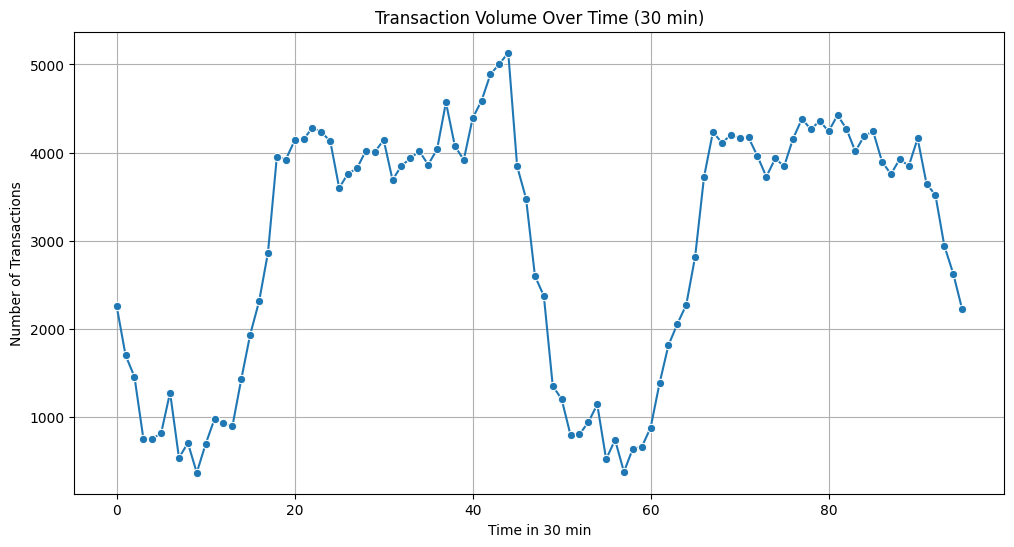

In [48]:
# Grouping transactions after every 30 minutes
halfhour_transactions = df.groupby('Time_30Min').size()

# Plotting the transaction volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=halfhour_transactions.index, y=halfhour_transactions.values, marker='o')
plt.title('Transaction Volume Over Time (30 min)')
plt.xlabel('Time in 30 min')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


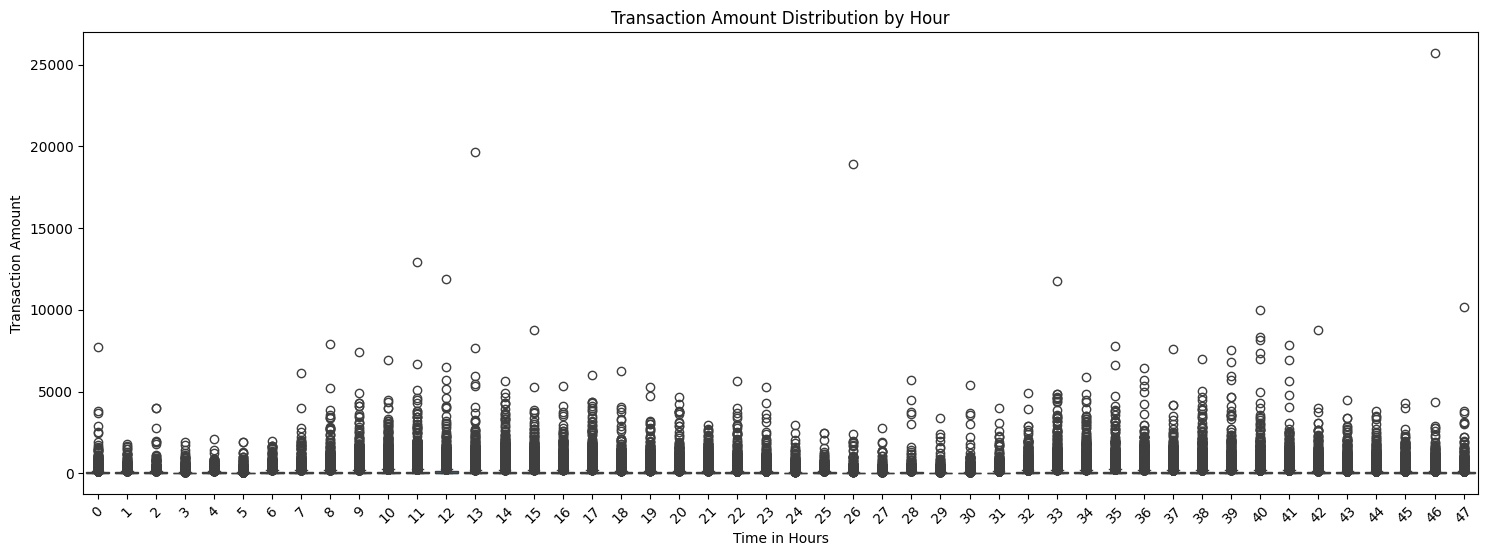

In [49]:
# Boxplot of transaction amounts over hourly intervals
plt.figure(figsize=(18, 6))
sns.boxplot(x='Time_1Hour', y='Amount', data=df)
plt.title('Transaction Amount Distribution by Hour')
plt.xlabel('Time in Hours')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()


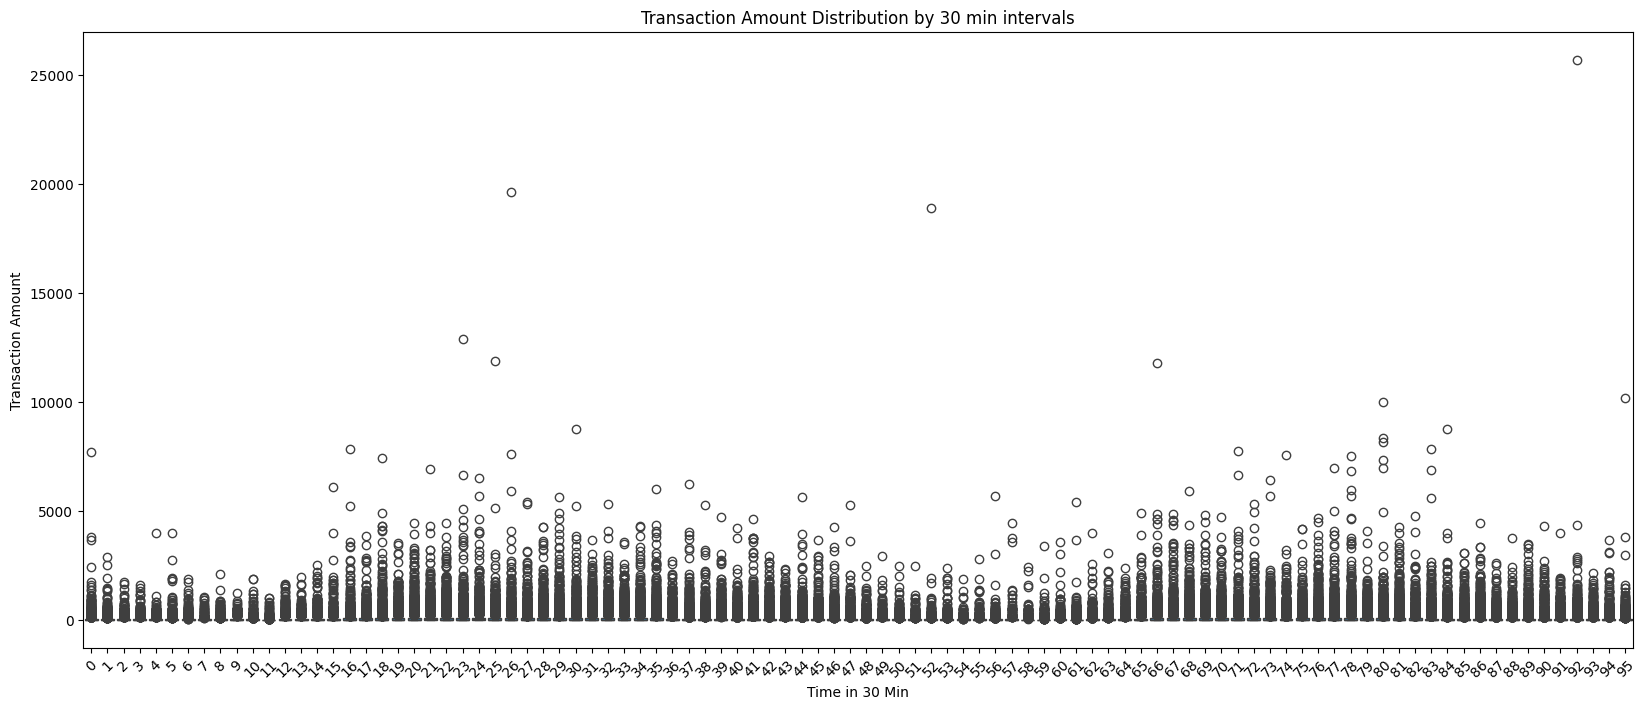

In [50]:
# Boxplot of transaction amounts over 30 min intervals
plt.figure(figsize=(20, 8))
sns.boxplot(x='Time_30Min', y='Amount', data=df)
plt.title('Transaction Amount Distribution by 30 min intervals')
plt.xlabel('Time in 30 Min')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()


<ipython-input-51-36c25a9e7b7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_count_by_hour.index, y=fraud_count_by_hour.values, palette='Reds')


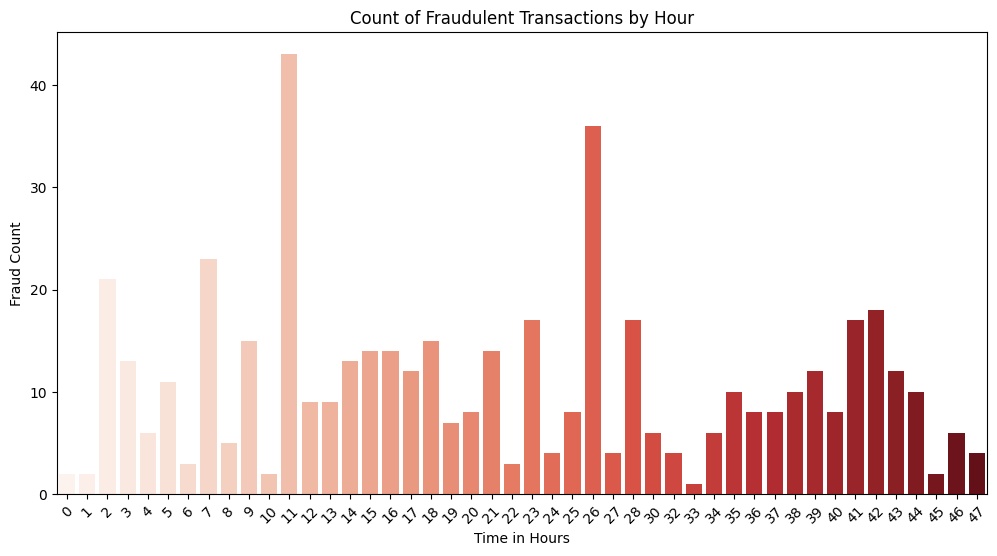

In [51]:
# Count of frauds per hour
fraud_count_by_hour = df[df['Class'] == 1].groupby('Time_1Hour').size()

# Plotting fraud count
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_count_by_hour.index, y=fraud_count_by_hour.values, palette='Reds')
plt.title('Count of Fraudulent Transactions by Hour')
plt.xlabel('Time in Hours')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-52-e025f4a79355>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_hour.index, y=fraud_rate_by_hour.values, palette='Reds')


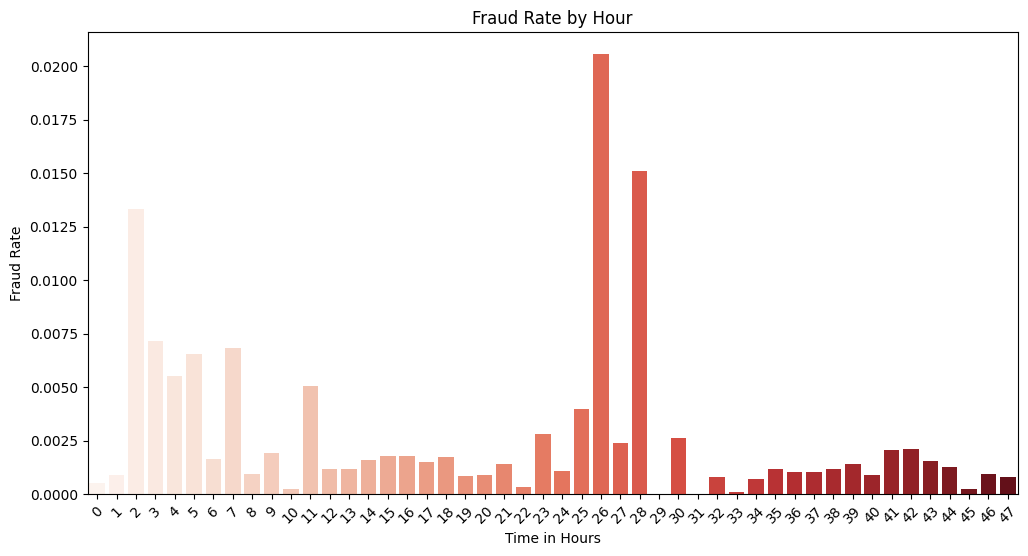

In [52]:
# Fraud rate by hour
fraud_rate_by_hour = df.groupby('Time_1Hour')['Class'].mean()

# Plotting fraud rate
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_rate_by_hour.index, y=fraud_rate_by_hour.values, palette='Reds')
plt.title('Fraud Rate by Hour')
plt.xlabel('Time in Hours')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()


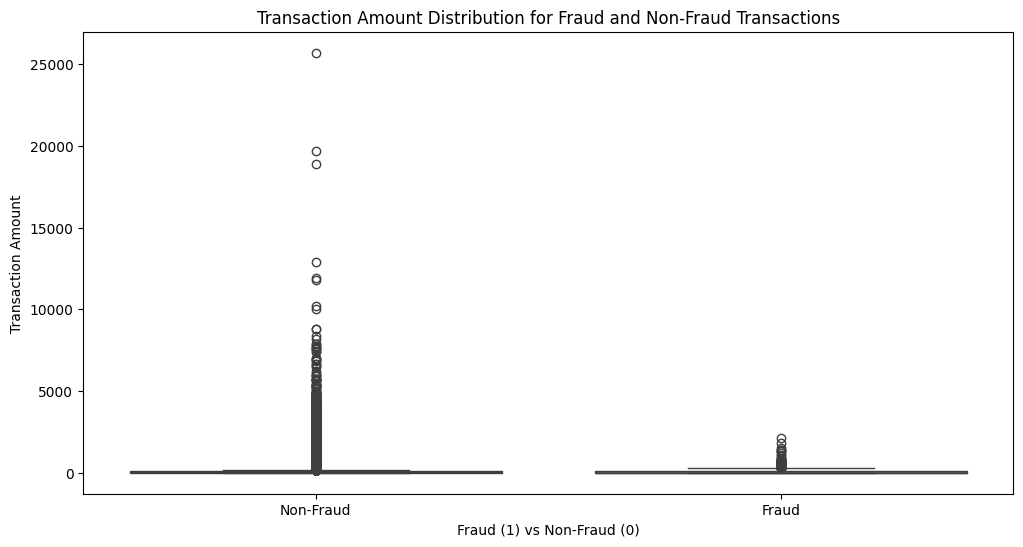

In [53]:
# Boxplot for fraud vs. non-fraud transaction amounts
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount Distribution for Fraud and Non-Fraud Transactions')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


# Insights

# Modelling

In [63]:
# Machine learning
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)


In [62]:
# Define features and target
X = df.drop(columns=['Class'])  # All features except the target
y = df['Class']                 # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [64]:
# Apply Min-Max Scaling to Time and Amount columns
min_max_scaler = MinMaxScaler()
X_train[['Time', 'Amount']] = min_max_scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = min_max_scaler.transform(X_test[['Time', 'Amount']])


In [66]:
# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify class balance after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_train_resampled).value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution before SMOTE: Class
0    199008
1       356
Name: count, dtype: int64
Class distribution after SMOTE: Class
0    199008
1    199008
Name: count, dtype: int64


In [67]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

In [68]:
from sklearn.metrics import precision_recall_curve, auc, precision_score, recall_score, f1_score

# Predictions and probabilities
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and F1-score
precision_log = precision_score(y_test, y_pred_log, zero_division=0)
recall_log = recall_score(y_test, y_pred_log, zero_division=0)
f1_log = f1_score(y_test, y_pred_log, zero_division=0)

# Precision-Recall Curve and AUPRC
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob_log)
auprc_log = auc(recall_curve, precision_curve)

# Output the metrics
print("Logistic Regression Metrics:")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")
print(f"AUPRC: {auprc_log:.4f}")


Logistic Regression Metrics:
Precision: 0.0634
Recall: 0.9191
F1-Score: 0.1185
AUPRC: 0.7872


Logistic Regression Evaluation Metrics
              precision    recall  f1-score   support

           0     0.9999    0.9783    0.9890     85307
           1     0.0634    0.9191    0.1185       136

    accuracy                         0.9782     85443
   macro avg     0.5316    0.9487    0.5538     85443
weighted avg     0.9984    0.9782    0.9876     85443



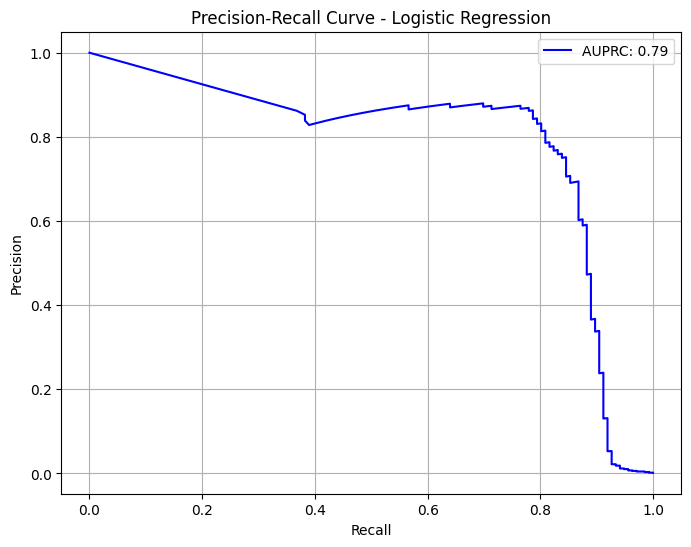

In [70]:
from sklearn.metrics import precision_recall_curve, auc

# Predictions and probabilities
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Classification report without accuracy
print("Logistic Regression Evaluation Metrics")
print(classification_report(y_test, y_pred_log, digits=4, zero_division=0))

# Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_prob_log)
auprc_log = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUPRC: {auprc_log:.2f}", color="blue")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


In [73]:
# Predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

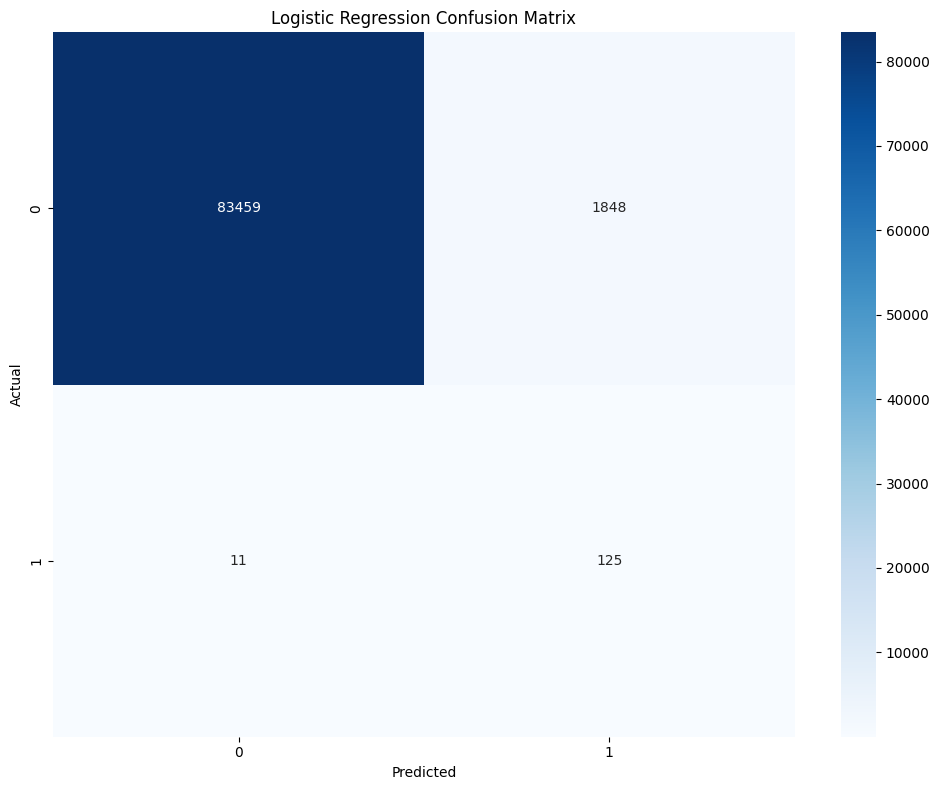

In [81]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(10,8))

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [71]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


KeyboardInterrupt: 

In [ ]:
# Predictions and probabilities
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)

# Precision-Recall Curve and AUPRC
precision_curve_rf, recall_curve_rf, _ = precision_recall_curve(y_test, y_prob_rf)
auprc_rf = auc(recall_curve_rf, precision_curve_rf)

# Output the metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUPRC: {auprc_rf:.4f}")


In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Predictions and probabilities
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Classification report without accuracy
print("Logistic Regression Evaluation Metrics")
print(classification_report(y_test, y_pred_log, digits=4, zero_division=0))

# Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_prob_log)
auprc_log = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUPRC: {auprc_log:.2f}", color="blue")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=1), StandardScaler(), LogisticRegression(max_iter=500))
scores = cross_val_score(pipe, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.97928139 0.98060035 0.97994087 0.9802816  0.97967685] 0.9799562099270223


In [56]:
# # Include high-correlation V columns + Amount and Time
# selected_features = ['V1', 'V5', 'V7', 'V10', 'V12', 'V16', 'V18', 'V19', 'V21', 'V22', 'V23', 'Time', 'Amount', 'Class']
# df_with_time_amount = df[selected_features]

# # Split data into features (X) and target (y)
# X = df_with_time_amount.drop('Class', axis=1)
# y = df_with_time_amount['Class']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [57]:
# # Include only high-correlation V columns
# high_corr_v_columns = ['V1', 'V5', 'V7', 'V10', 'V12', 'V16', 'V18', 'V19', 'V21', 'V22', 'V23', 'Class']
# df_without_time_amount = df[high_corr_v_columns]

# # Split data into features (X) and target (y)
# X = df_without_time_amount.drop('Class', axis=1)
# y = df_without_time_amount['Class']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [58]:
# # Include only high-correlation V columns
# high_corr_v_columns = ['V1', 'V5', 'V7', 'V10', 'V12', 'V16', 'V18', 'V19', 'V21', 'V22', 'V23', 'Class']
# df_without_time_amount = df[high_corr_v_columns]

# # Split data into features (X) and target (y)
# X = df_without_time_amount.drop('Class', axis=1)
# y = df_without_time_amount['Class']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
